# MLflow Tracking

The MLflow Tracking component is an API and UI for logging parameters, code versions, metrics, and output files when running your machine learning code and for later visualizing the results. MLflow Tracking lets you log and query experiments using Python, REST, R API, and Java API APIs.

Find more information [here](https://www.mlflow.org/docs/latest/tracking.html)

It captures all these

*   Logging parameters
*   Code versions
*   Metrics
*   Artifacts (Model and data files)
*   Start and End time of the run
*   Tags and notes as additional information

# MLflow Projects

An MLflow Project is a format for packaging data science code in a reusable and reproducible way, based primarily on conventions. In addition, the Projects component includes an API and command-line tools for running projects, making it possible to chain together projects into workflows. Find more information [here](https://www.mlflow.org/docs/latest/projects.html)


# MLflow Models

MLflow Models offer a convention for packaging machine learning models in multiple flavors, and a variety of tools to help deploy them. Each model is saved as a directory containing arbitrary files and a descriptor file that lists several “flavors” the model can be used in. For example, a Tensorflow model can be loaded as a TensorFlow DAG, or as a python function to apply to input data.Find more information [here](https://www.mlflow.org/docs/latest/models.html)


# MLflow Registry

The MLflow Model Registry component is a centralized model store, set of APIs, and UI, to collaboratively manage the full lifecycle of an MLflow Model. It provides model lineage (which MLflow experiment and run produced the model), model versioning, stage transitions (for example from staging to production), and annotations.

Find more information [here](https://www.mlflow.org/docs/latest/model-registry.html) 

In [ ]:
#install MlFlow

!pip install mlflow --quiet
!pip install pyngrok --quiet

In [ ]:
#Check whether MLFlow is installed or not

!mlflow

In [ ]:
import mlflow
import mlflow.sklearn
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
import sys
import os

# mlflow.set_experiment('LearnMLFlow-Demo')
mlflow.set_experiment('MLFlow-Demo')

<Experiment: artifact_location='file:///content/mlruns/1', experiment_id='1', lifecycle_stage='active', name='MLFlow-Demo', tags={}>

In [ ]:
def eval_metrics(actual, pred):
        rmse = np.sqrt(mean_squared_error(actual, pred))
        mae = mean_absolute_error(actual, pred)
        r2 = r2_score(actual, pred)
        mape = mean_absolute_percentage_error(actual, pred)
        return rmse, mae, r2, mape

# Loading Data and Variable Definitions File

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Wasimds/Datasets/main/winequality-red.csv",delimiter=",")
vardefs = pd.read_csv("https://raw.githubusercontent.com/Wasimds/Datasets/main/winequality_red_variable_definitions.csv",delimiter=",")

## Sample print of each data

In [ ]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
vardefs.head(20)

,Variable,Definition
0,fixed acidity,most acids involved with wine or fixed or nonv...
1,volatile acidity,"the amount of acetic acid in wine, which at to..."
2,citric acid,"found in small quantities, citric acid can add..."
3,residual sugar,the amount of sugar remaining after fermentati...
4,chlorides,the amount of salt in the wine
5,free sulfur dioxide,the free form of SO2 exists in equilibrium bet...
6,total sulfur dioxide,amount of free and bound forms of S02; in low ...
7,density,the density of water is close to that of water...
8,pH,describes how acidic or basic a wine is on a s...
9,sulphates,"contribute to sulfur dioxide gas (S02) levels,..."


# Info And Summary Of The Data

In [ ]:
print("Data Info : ",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Data Info :  None


In [ ]:
data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# Model Development and Evaluation

In [ ]:
def train_model(alpha,l1_ratio):
    train, test = train_test_split(data)

    # The predicted column is "quality" which is a scalar from [3, 9]
    train_x = train.drop(["quality"], axis=1)
    test_x = test.drop(["quality"], axis=1)
    train_y = train[["quality"]]
    test_y = test[["quality"]]

    with mlflow.start_run():
        lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        lr.fit(train_x, train_y)

        predicted_qualities = lr.predict(test_x)

        (rmse, mae, r2,mape) = eval_metrics(test_y, predicted_qualities)

        # Log in mlflow (parameter)
        mlflow.log_param("alpha", alpha)
        mlflow.log_param("l1_ratio", l1_ratio)

        # Log in mlflow (metrics)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("r2", r2)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("mape", mape)
        
        # log in mlflow (model)
        # mlflow.sklearn.log_model(lr, f"model")

        # Tag the model
        # mlflow.set_tags(tags)

        # log in mlflow (model)
        mlflow.sklearn.log_model(lr, "model")

In [ ]:
train_model(0.4,0.1)
train_model(0.1,0.1)
train_model(0.5,0.5)
train_model(0.2,0.2)
train_model(0.1,0.4)
train_model(0.15,0.15)
train_model(0.36,0.36)

In [ ]:
!mlflow ui

[2021-12-29 12:49:28 +0000] [1688] [INFO] Starting gunicorn 20.1.0
[2021-12-29 12:49:28 +0000] [1688] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2021-12-29 12:49:28 +0000] [1688] [ERROR] Retrying in 1 second.

Aborted!
[2021-12-29 12:49:29 +0000] [1688] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2021-12-29 12:49:29 +0000] [1688] [ERROR] Retrying in 1 second.
[2021-12-29 12:49:30 +0000] [1688] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2021-12-29 12:49:30 +0000] [1688] [ERROR] Retrying in 1 second.
[2021-12-29 12:49:31 +0000] [1688] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2021-12-29 12:49:31 +0000] [1688] [ERROR] Retrying in 1 second.
[2021-12-29 12:49:32 +0000] [1688] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2021-12-29 12:49:32 +0000] [1688] [ERROR] Retrying in 1 second.
[2021-12-29 12:49:33 +0000] [1688] [ERROR] Can't connect to ('127.0.0.1', 5000)


In [ ]:
!pip install mlflow --quiet
!pip install pyngrok --quiet

import mlflow

with mlflow.start_run(run_name="MLflow on Colab"):
  mlflow.log_metric("m1", 2.0)
  mlflow.log_param("p1", "mlflow-colab")

# run tracking UI in the background
get_ipython().system_raw("mlflow ui --port 5000 &") # run tracking UI in the background

# create remote tunnel using ngrok.com to allow local port access
# borrowed from https://colab.research.google.com/github/alfozan/MLflow-GBRT-demo/blob/master/MLflow-GBRT-demo.ipynb#scrollTo=4h3bKHMYUIG6

from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "22unZF1cg5sUIVx8Il335I0pLFx_3gzoz22PLKUtXPX3zx4A3"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)

print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://1ae1-34-86-129-239.ngrok.io


In [ ]:
%matplotlib inline
import numpy as np
import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

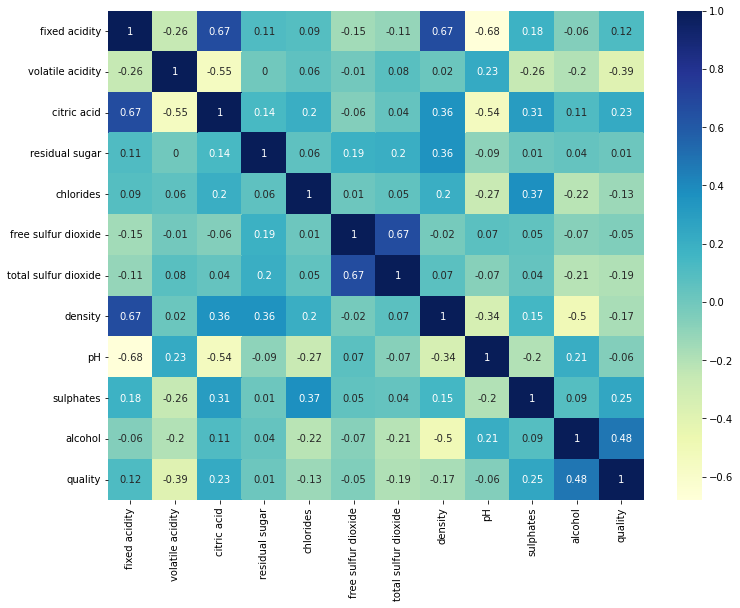

In [ ]:
plt.figure(figsize=(12, 9));
correlation_matrix = data.corr().round(2);
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True);

In [ ]:
# df = pd.DataFrame(data.data, columns=data.feature_names)
# df.head()

for feature_name in data.columns:
    plt.figure(figsize=(5, 4));
    plt.scatter(data[feature_name], data['quality']);
    plt.ylabel('Quality', size=12);
    plt.xlabel(feature_name, size=12);
plt.show();

In [ ]:
X_alcohol = data.alcohol
y_quality = data.quality


X_alcohol = np.array(X_alcohol).reshape(-1,1)
y_quality = np.array(y_quality).reshape(-1,1)

print(X_alcohol.shape)
print(y_quality.shape)

(1599, 1)
(1599, 1)


# Splitting the data into training and testing sets

In [ ]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = \
             train_test_split(X_alcohol, y_quality, test_size = 0.2, random_state=5)

print(X_train_1.shape)
print(Y_train_1.shape)
print(X_test_1.shape)
print(Y_test_1.shape)

(1279, 1)
(1279, 1)
(320, 1)
(320, 1)


In [ ]:
X = data.drop('quality', axis = 1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

# Model Evaluation For Training Data
y_train_predict = reg_all.predict(X_train)

rmse = (np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.6512995910592837
R2 score is 0.35




In [ ]:
# Model Evaluation for Test Set
y_pred = reg_all.predict(X_test)
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2)

print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))

The model performance for training set
--------------------------------------
Root Mean Squared Error: 0.6245199307980126
R^2: 0.4


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


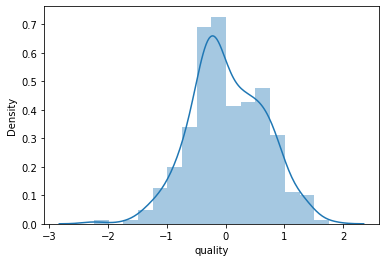

In [ ]:
sns.distplot(y_test - y_pred);

              Linear: -0.44, 0.06
               Lasso: -0.63, 0.07
          ElasticNet: -0.63, 0.06
               Ridge: -0.44, 0.06
       BayesianRidge: -0.44, 0.06
                 KNN: -0.57, 0.10
        DecisionTree: -0.60, 0.11
                 SVR: -0.55, 0.06
            AdaBoost: -0.42, 0.05
       GradientBoost: -0.40, 0.04
        RandomForest: -0.35, 0.05


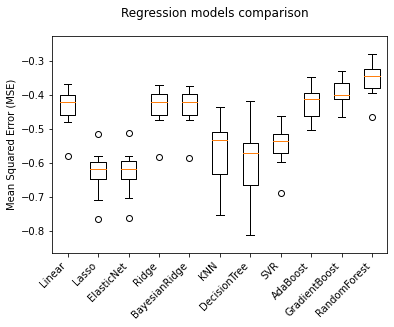

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# user variables to tune
seed    = 9
folds   = 10
metric  = "neg_mean_squared_error"

# hold different regression models in a single dictionary
models = dict()
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["Ridge"]         = Ridge()
models["BayesianRidge"] = BayesianRidge()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()

# 10-fold cross validation for each model
model_results = list()
model_names   = list()
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed, shuffle=True)
    results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)
    
    model_results.append(results)
    model_names.append(model_name)
    print("{:>20}: {:.2f}, {:.2f}".format(model_name, round(results.mean(), 5), 
                                  round(results.std(), 5)))

# box-whisker plot to compare regression models
figure = plt.figure();
figure.suptitle('Regression models comparison');
ax = figure.add_subplot(111);
plt.boxplot(model_results);
ax.set_xticklabels(model_names, rotation = 45, ha="right");
ax.set_ylabel("Mean Squared Error (MSE)");
plt.margins(0.05, 0.1);
#plt.savefig("model_mse_scores.png")
plt.show();
#plt.clf()
#plt.close()

**Based on the above comparison, we can see that `Gradient Boosting Regression` model outperforms all the other regression models.**

## <font color="red">Model with Gradient Boosted Tree</font>

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

gbr_predicted = gbr.predict(X_test)
gbr_expected = y_test

In [ ]:
print("RMSE: %r " % np.sqrt(np.mean((gbr_predicted - gbr_expected) ** 2)))

RMSE: 0.6023555927712075 


In [ ]:
print('Coeff of determination: {:.4f}'.format(metrics.r2_score(gbr_expected, gbr_predicted)))

Coeff of determination: 0.4448
